In [ ]:
import pandas as pd
train_data = pd.read_csv('https://raw.githubusercontent.com/MohamedAfham/Twitter-Sentiment-Analysis-Supervised-Learning/master/Data/train_tweets.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/MohamedAfham/Twitter-Sentiment-Analysis-Supervised-Learning/master/Data/test_tweets.csv')

In [ ]:
df = train_data
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
test_data.head(10)

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
5,31968,choose to be :) #momtips
6,31969,something inside me dies ð¦ð¿â¨ eyes nes...
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...
8,31971,@user @user @user i will never understand why...
9,31972,#delicious #food #lovelife #capetown mannaep...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


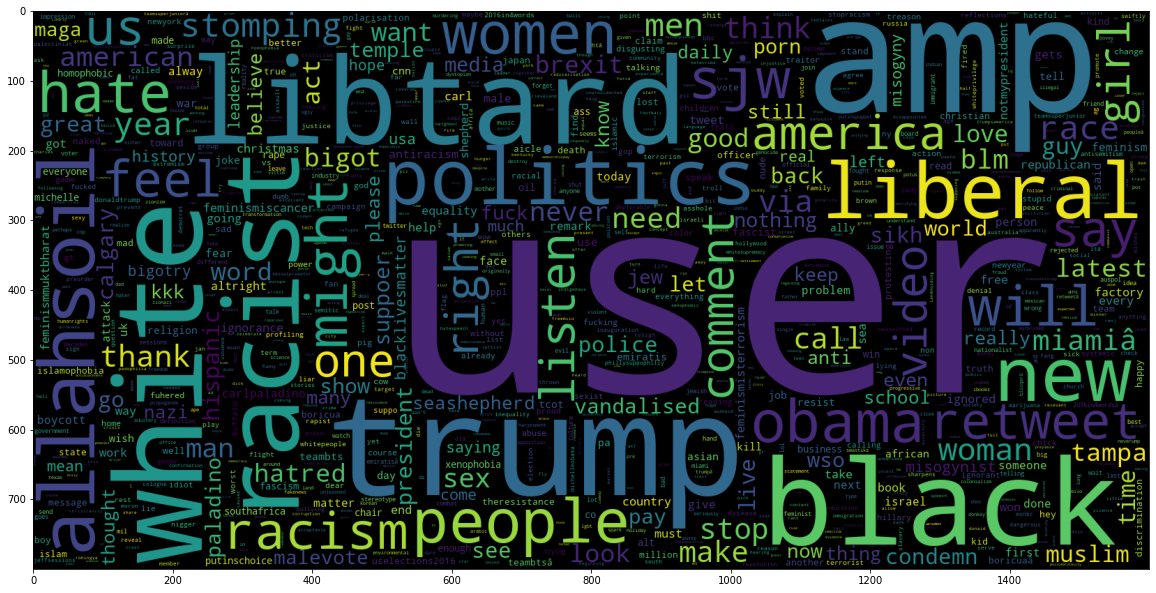

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
neg_words = df[df['label']==1]['tweet']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(neg_words))
plt.imshow(wc)

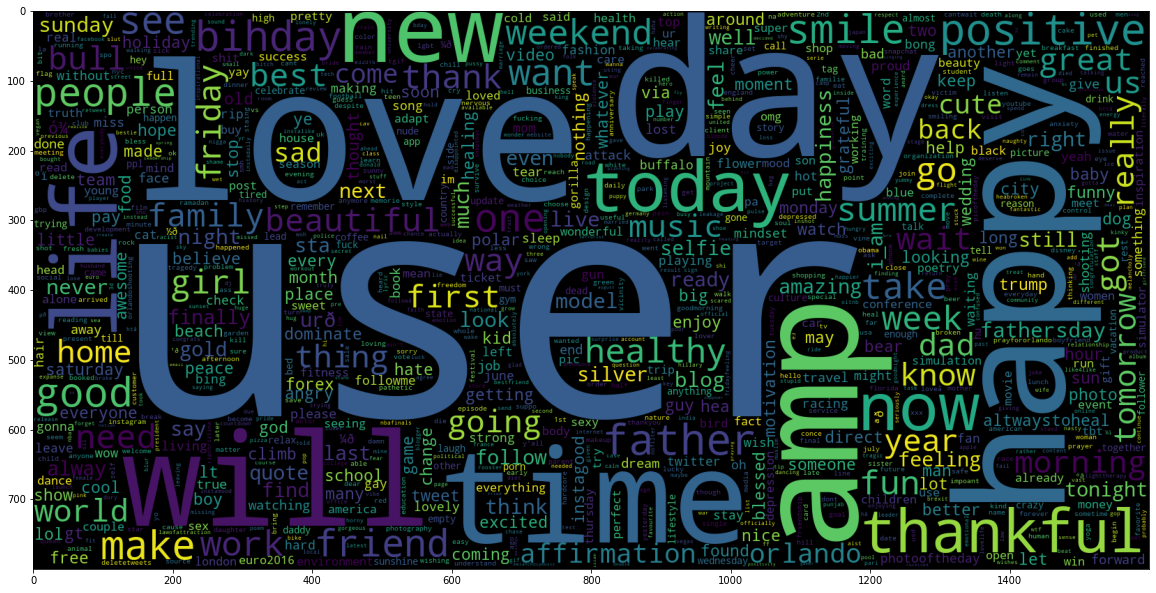

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
pos_words = df[df['label']==0]['tweet']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(pos_words))
plt.imshow(wc)

In [ ]:
X = df['tweet']
y = df['label']
X_pred = test_data['tweet']

In [ ]:
Xlist=[]
for tweet in X:
  Xlist.append(tweet.lower())

In [ ]:
Xlist_pred=[]
for tweet in X_pred:
  Xlist_pred.append(tweet.lower())

Tokenize and Remove Punctuations

In [ ]:
import nltk
nltk.download("punkt")
from nltk.tokenize import word_tokenize

token_list=[]
for tweet in Xlist:
  words=word_tokenize(tweet)
  new_tweets= [word for word in words if word.isalnum()]
  token_list.append(new_tweets)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
token_pred_list=[]
for tweet in Xlist_pred:
  words=word_tokenize(tweet)
  new_tweets= [word for word in words if word.isalnum()]
  token_pred_list.append(new_tweets)

In [ ]:
token_list[0]

['user',
 'when',
 'a',
 'father',
 'is',
 'dysfunctional',
 'and',
 'is',
 'so',
 'selfish',
 'he',
 'drags',
 'his',
 'kids',
 'into',
 'his',
 'dysfunction',
 'run']

In [ ]:
token_pred_list[0]

['studiolife',
 'aislife',
 'requires',
 'passion',
 'dedication',
 'willpower',
 'to',
 'find']

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
clean_tl = []

for l in token_list:
  clean=[]
  for token in l:
    if token not in stopwords.words("english"):
      clean.append(token)
  clean_tl.append(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
clean_pred_tl = []

for l in token_pred_list:
  clean=[]
  for token in l:
    if token not in stopwords.words("english"):
      clean.append(token)
  clean_pred_tl.append(clean)

In [ ]:
clean_tl[0]

['user',
 'father',
 'dysfunctional',
 'selfish',
 'drags',
 'kids',
 'dysfunction',
 'run']

In [ ]:
clean_pred_tl[0]

['studiolife',
 'aislife',
 'requires',
 'passion',
 'dedication',
 'willpower',
 'find']

In [ ]:
from nltk.stem.porter import PorterStemmer
sno = PorterStemmer()
stemmed_list=[]
for l in clean_tl:
  clean=[]
  for token in l:
    word=sno.stem(token)
    if word not in clean:
      clean.append(word)
  stemmed_list.append(clean)

In [ ]:
stemmed_list[5]

['huge',
 'fan',
 'fare',
 'big',
 'talk',
 'leav',
 'chao',
 'pay',
 'disput',
 'get',
 'allshowandnogo']

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download("wordnet")
wnl = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
final_list=[]
for l in clean_tl:
  clean=[]
  for token in l:
    word=wnl.lemmatize(token)
    if word not in clean:
      clean.append(word)
  final_list.append(clean)

In [ ]:
final_pred_list=[]
for l in clean_pred_tl:
  clean=[]
  for token in l:
    word=wnl.lemmatize(token)
    if word not in clean:
      clean.append(word)
  final_pred_list.append(clean)

In [ ]:
final_list[5]

['huge',
 'fan',
 'fare',
 'big',
 'talking',
 'leave',
 'chaos',
 'pay',
 'dispute',
 'get',
 'allshowandnogo']

In [ ]:
final_pred_list[0]

['studiolife',
 'aislife',
 'requires',
 'passion',
 'dedication',
 'willpower',
 'find']

In [ ]:
# X_new = pd.Series(final_list)
# X_pred = pd.Series(final_pred_list)

In [ ]:
clean_tweet_list=[]
for tok_list in final_list:
  clean_tweet = ""
  for token in tok_list:
    clean_tweet += token+" "
  clean_tweet_list.append(clean_tweet.rstrip())

In [ ]:
clean_tweet_list

In [ ]:
df['clean_tweets']=clean_tweet_list
df.head()

,id,label,tweet,clean_tweets
0,1,0,@user when a father is dysfunctional and is s...,user father dysfunctional selfish drag kid dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,user thanks lyft credit ca use cause offer whe...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model love u take time
4,5,0,factsguide: society now #motivation,factsguide society motivation


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['clean_tweets'],df['label'],test_size = 0.2, random_state =47)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import BernoulliNB
pipeline = Pipeline([
    ('bow',CountVectorizer(max_features=500000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', BernoulliNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [ ]:
pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(accuracy_score(predictions,y_test))

0.9466604098232442


In [ ]:
# from gensim.models import Word2Vec
# from gensim.models import KeyedVectors
# model = Word2Vec(X_train,size=100,min_count=2,workers=4)


In [ ]:
# X_train_vec=[]
# for l in X_train:
#   vec_l= []
#   for word in l:
#     try:
#       vec = model.wv[word]
#       vec_l.append(vec)
#     except:
#       pass
#   X_train_vec.append(vec_l) 

In [ ]:
# X_test_vec=[]
# for l in X_test:
#   vec_l=[]
#   for word in l:
#     try:
#       vec = model.wv[word]
#       vec_l.append(vec)
#     except:
#       pass
#   X_test_vec.append(vec_l)

In [ ]:
# def get_tweets_for_model(cleaned_tokens_list):
#     for tweet_tokens in cleaned_tokens_list:
#         yield dict([token, True] for token in tweet_tokens)

In [ ]:
# X_train_vec = get_tweets_for_model(X_train_vec)
# X_test_vec = get_tweets_for_model(X_test_vec)

In [ ]:
# from sklearn.svm import LinearSVC
# SVCmodel = LinearSVC()
# SVCmodel.fit(X_train, y_train)